# **2º Projeto Prático - Análise de Dados e Predição com Python e Pandas**

Análise da base de dados de preços de aluguéis, em São Paulo, usando Python e a biblioteca Pandas. Utilização da regressão linear para modelar a relação entre variáveis do conjunto de dados.

# **Dicionário dos dados**

*   **address**: endereço do imóvel
*   **district**: bairro
*   **area**: m² do imovel
*   **bedrooms**: quantidade de quartos do imóvel
*   **garage**: quantidade de garagens do imóvel  
*   **type**: tipo do imóvel
*   **rent**: valor do aluguel do imóvel
*   **total**: valor total não especificado


# **Coleta de dados - dataset**

### Importar bibliotecas

In [125]:
# Importar as bibliotecas
import pandas as pd
import numpy as np

In [126]:
import matplotlib.pyplot as plt
import statsmodels.api as sn
import seaborn as sns

In [127]:
import warnings
warnings.filterwarnings("ignore")

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Importar dataset

In [129]:
url = 'https://raw.githubusercontent.com/Dricalucia/Programa_Desenvolve_2024/main/2o%20Desafio%20-%20An%C3%A1lise%20de%20Dados%20e%20Predi%C3%A7%C3%A3o%20com%20Python%20e%20Pandas/base-alugueis-sp.csv'
dados = pd.read_csv(url,sep=',')

# **Tratamento de Dados**

In [130]:
# Primeiras linhas do dataset
dados.head(5)

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [131]:
# Tamanho do dataset (linhasxcolunas)
dados.shape

(11657, 8)

In [132]:
# Tipos de dados de cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [133]:
# Verificar se há valores nulos
dados.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [134]:
# Verificar se há dados duplicados no dataset
dados.duplicated().sum()

0

In [135]:
# Identificar os tipos de imoveis do dataset
dados['type'].unique()

array(['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa'],
      dtype=object)

In [136]:
# Identificar os tipos de imoveis do dataset
dados['district'].unique()

array(['Belenzinho', 'Vila Marieta', 'Pinheiros', ..., 'Vila Elvira',
       'Jardim Vitoria Regia', 'Retiro Morumbi'], dtype=object)

In [137]:
# Remover a coluna total, pois não especifica a que se refere o total
dados.drop(['total'], axis=1, inplace=True)
dados.head()

,address,district,area,bedrooms,garage,type,rent
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000


In [138]:
# Filtrar os dados para imóveis com 0 quartos
imoveis_com_0_quartos = dados[dados['bedrooms'] == 0]

# Listar os tipos de imóveis que possuem 0 quartos
tipos_com_0_quartos = imoveis_com_0_quartos['type'].unique()

# Exibir os tipos de imóveis que possuem 0 quartos
print("Tipos de imóveis que possuem 0 quartos:", tipos_com_0_quartos)


Tipos de imóveis que possuem 0 quartos: ['Studio e kitnet' 'Apartamento' 'Casa']


In [139]:
# Filtrar os dados para imóveis do tipo "apartamento" e "casa" com 0 quartos
imoveis_apartamento_casa_0_quartos = dados[(dados['bedrooms'] == 0) & (dados['type'].isin(['Apartamento', 'Casa']))]

# Ajustar configurações de exibição para evitar quebra de linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Exibir os dados filtrados em uma única linha por registro
print(imoveis_apartamento_casa_0_quartos.to_string())


                                 address                       district  area  bedrooms  garage         type   rent
476    Rua Doutor Miguel Vieira Ferreira                        Tatuapé    30         0       0  Apartamento   1840
1002             Rua Natividade Saldanha                      São Lucas    28         0       0  Apartamento   1100
1416             Rua Natividade Saldanha                      São Lucas    27         0       0  Apartamento   1100
1552             Rua Natividade Saldanha                      São Lucas    40         0       0  Apartamento   1300
1595             Rua Natividade Saldanha                      São Lucas    45         0       0  Apartamento   1400
1596                      Rua Marilândia                 Freguesia do Ó    70         0       0         Casa   3100
1925                     Rua Santa Lúcia              Cidade Mãe do Céu    22         0       0  Apartamento   1000
9501            Rua Dom Armando Lombardi                Vila Progredior 

In [140]:
# Remover os imoveis Casa e Apto com qtde de quartos zero
# Índices das linhas a serem removidas
indices_para_remover = [476, 1002, 1416, 1552, 1595, 1596, 1925, 9501, 9674, 10062, 10082]
dados = dados.drop(indices_para_remover)


In [141]:
# Separando o tipo studio e kitnet, com base na qtde de quartos. Categorizar numa nova colun,a tipo_imovel
dados['tipo_imovel'] = dados.apply(lambda row: 'Studio' if row['type'] == 'Studio e kitnet' and row['bedrooms'] == 0 else
                            'Kitnet' if row['type'] == 'Studio e kitnet' and row['bedrooms'] > 0 else row['type'], axis=1)
dados


,address,district,area,bedrooms,garage,type,rent,tipo_imovel
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,Kitnet
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,Kitnet
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,Apartamento
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,Casa em condomínio
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,Kitnet
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,Apartamento
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,Apartamento
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,Apartamento
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,Apartamento


In [142]:
# Remoção da coluna type
dados.drop('type', axis=1, inplace=True)

# **Análise descritiva**

In [143]:
# Analise descritiva de cada variável
dados.describe().round()

,area,bedrooms,garage,rent
count,11646.0,11646.0,11646.0,11646.0
mean,85.0,2.0,1.0,3250.0
std,74.0,1.0,1.0,2649.0
min,0.0,0.0,0.0,500.0
25%,40.0,1.0,0.0,1590.0
50%,60.0,2.0,1.0,2420.0
75%,96.0,3.0,2.0,3800.0
max,580.0,6.0,6.0,25000.0


In [144]:
variaveis = ['area', 'bedrooms', 'garage', 'rent']

# Loop para calcular e imprimir as estatísticas descritivas para cada variável
for variavel in variaveis:
  media = dados[variavel].mean()  # Média
  desvio_padrao = dados[variavel].std()  # Desvio padrão
  minimo = dados[variavel].min() # Mínimo
  maximo = dados[variavel].max()

  # Percentis
  percentil_25 = dados[variavel].quantile(0.25)
  percentil_50 = dados[variavel].median()  # ou dados[variavel].quantile(0.50)
  percentil_75 = dados[variavel].quantile(0.75)

  print(f"Análise da variável: {variavel}")
  print(f"Média: {media:.2f}")
  print(f"Desvio Padrão: {desvio_padrao:.2f}")
  print(f"Mínimo: {minimo:.2f}")
  print(f"Máximo: {maximo:.2f}")
  print(f"Percentil 25%: {percentil_25:.2f}")
  print(f"Mediana (50%): {percentil_50:.2f}")
  print(f"Percentil 75%: {percentil_75:.2f}")
  print("\n")


Análise da variável: area
Média: 84.66
Desvio Padrão: 74.02
Mínimo: 0.00
Máximo: 580.00
Percentil 25%: 40.00
Mediana (50%): 60.00
Percentil 75%: 96.00


Análise da variável: bedrooms
Média: 1.97
Desvio Padrão: 0.93
Mínimo: 0.00
Máximo: 6.00
Percentil 25%: 1.00
Mediana (50%): 2.00
Percentil 75%: 3.00


Análise da variável: garage
Média: 1.06
Desvio Padrão: 1.13
Mínimo: 0.00
Máximo: 6.00
Percentil 25%: 0.00
Mediana (50%): 1.00
Percentil 75%: 2.00


Análise da variável: rent
Média: 3250.22
Desvio Padrão: 2649.22
Mínimo: 500.00
Máximo: 25000.00
Percentil 25%: 1590.00
Mediana (50%): 2420.00
Percentil 75%: 3800.00




A ** a média área** da maioria dos imóveis é de **85 m²**, porém possuem um **desvio padrão muito alto**, isso indica a variação nos tamanhos dos imóveis.

No dataset **existe dados de imoveis com 0m²** e isso pode indicar erros de lançamento. Deste modo, deve-se **considerar os imóveis com mais de 40m²**, o que **correspondem ao percentil de 25% dos imóveis**.

A **média e a mediana de quartos por imóvel** são de **2 quartos**. Do mesmo modo, **a média e a mediana de garagem** por imóvel **é de 1 vaga**.


A **média do aluguel é R$ 3.251,00**, porém apresenta um **desvio padrão muito alto**, assim como o tamanho dos imóveis em metros quadrados. Isso sugere que o valor do aluguel varia de acordo com o tamanho dos imóveis.

Além disso, **a mediana do aluguel é de R$ 2.415,00**, o que indica que metade dos imóveis possuem aluguel abaixo desse valor.







In [145]:
# Novo dataset com os imóveis com area superior a 40 m²
dados_2 = dados[dados['area'] >= 40]
dados_2.head()


,address,district,area,bedrooms,garage,rent,tipo_imovel
3,Rua Júlio Sayago,Vila Ré,56,2,2,1750,Casa em condomínio
5,Rua Domingos Paiva,Brás,50,2,1,3800,Apartamento
6,Rua Guararapes,Brooklin Paulista,72,2,1,3500,Apartamento
10,Rua dos Carmelitas,Sé,63,2,0,1500,Apartamento
13,Rua Herison,Lauzane Paulista,50,3,0,1437,Casa em condomínio


# **Modelagem de Regressão Linear**

### Correlação

In [146]:
# Correlação
dados_2.corr(numeric_only=True)

,area,bedrooms,garage,rent
area,1.000000,0.682919,0.698999,0.650367
bedrooms,0.682919,1.000000,0.602459,0.500935
garage,0.698999,0.602459,1.000000,0.590797
rent,0.650367,0.500935,0.590797,1.000000


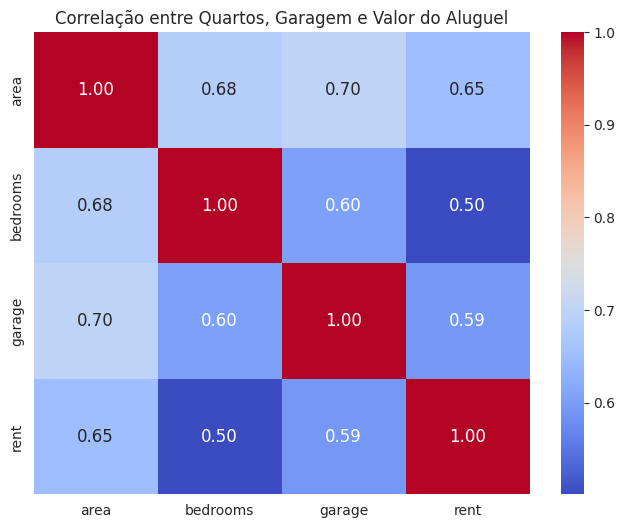

In [147]:
# Mapa de calor da correlação
correlation_matrix = dados_2.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlação entre Quartos, Garagem e Valor do Aluguel')
plt.show()

A área do imóvel está fortemente correlacionada com o número de quartos e garagem, o que indica que imóveis maiores tendem a ter mais quartos e mais vagas de garagem.
A área, quartos e garagem têm correlações positivas moderadas com o valor do aluguel. Isso sugere que imóveis maiores, com mais quartos e vagas de garagem, geralmente têm aluguéis mais altos.

### Boxplot

In [122]:
# Definir a paleta de cores
sns.set_palette('pastel')

# Definir o estilo
sns.set_style('whitegrid')

Text(0.5, 0, 'Preço dos Imóveis (R$)')

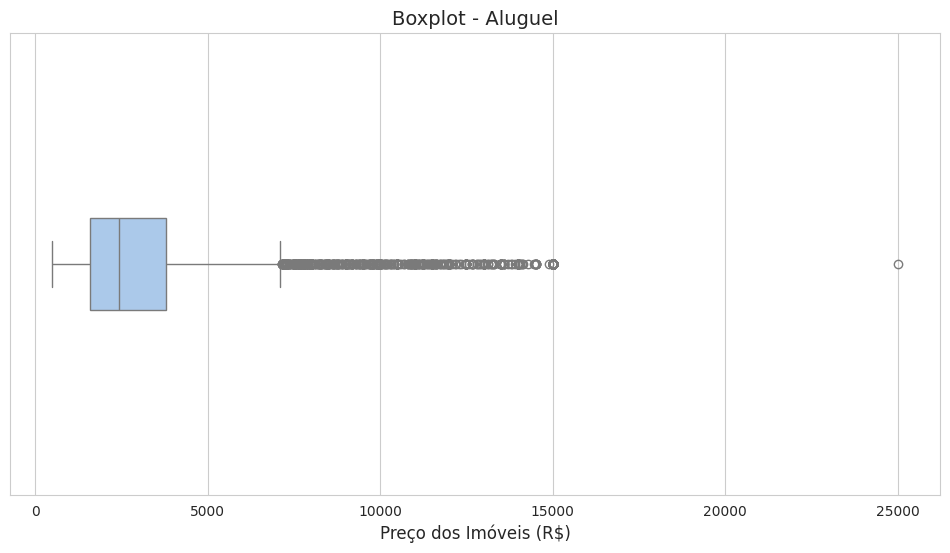

In [123]:
# Comportamento da Variável Dependente (Y)
ax = sns.boxplot(dados['rent'], orient = 'h', width = 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot - Aluguel', fontsize = 14)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize = 12)

A representação deste gráfico apresenta uma visão da distribuição dos valores de aluguel em diversas faixas de preço. Essa visualização é fundamental para uma avaliação precisa do comportamento dos preços dos alugueis.

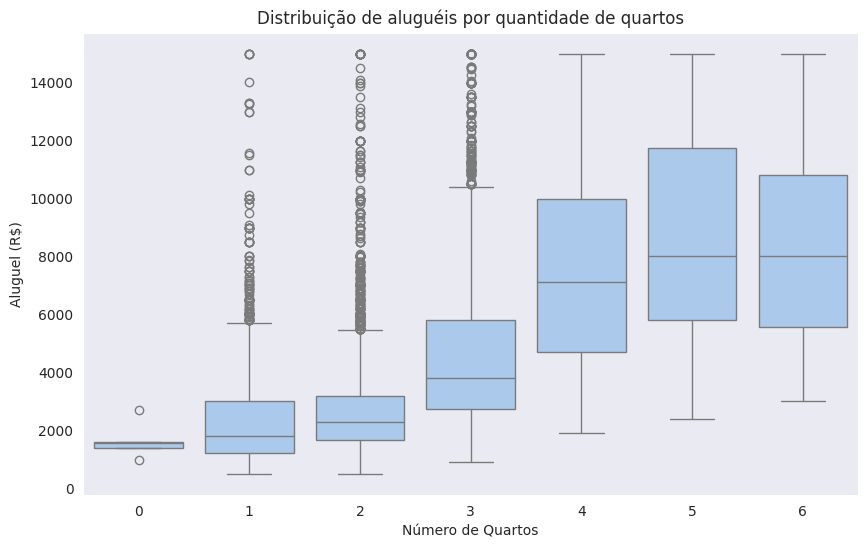

In [121]:
# Comparando aluguéis por número de quartos
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_2, x='bedrooms', y='rent')

plt.title('Distribuição de aluguéis por quantidade de quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Aluguel (R$)')
plt.show()

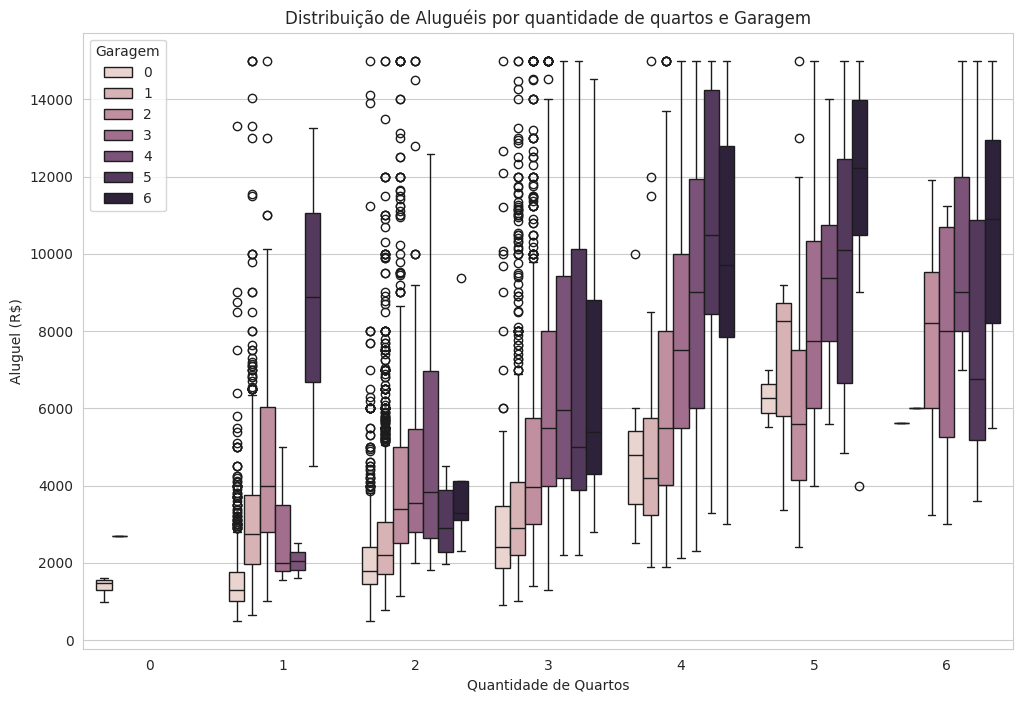

In [124]:
# Comparação dos aluguéis por quantidade de quartos e garagem
plt.figure(figsize=(12, 8))
sns.boxplot(data=dados_2, x='bedrooms', y='rent', hue='garage')
plt.title('Distribuição de Aluguéis por quantidade de quartos e Garagem')
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Aluguel (R$)')
plt.legend(title='Garagem')
plt.show()

Na análise da quantidade de quartos e garagem nos valores de aluguel demonstra que imóveis com mais quartos geralmente têm aluguéis mais elevados, refletindo uma relação direta entre espaço e custo. E ao considerar a garagem, verifica-se que os imóveis com mais vagas apresentam aluguéis superiores, destacando variações conforme a quantidade de quartos.

### Distribuição de frequências

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço dos alugueis dos imóveis (R$)', ylabel='Density'>

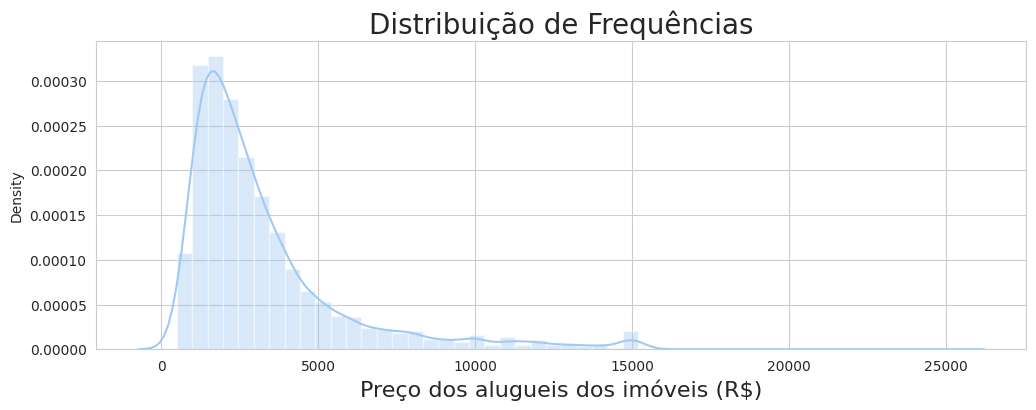

In [148]:
# Distribuição de frequências dos preços dos aluguéis
ax = sns.distplot(dados['rent'])
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos alugueis dos imóveis (R$)', fontsize=16)
ax

Na representação do gráfico percebemos uma alta concentração de imóveis com valores mais baixos,mas há uma cauda longa à direita, indicando a presença de alguns imóveis com aluguéis muito altos.

A representação através do gráfico boxplot oferece uma visão abrangente da distribuição dos valores de aluguel em diversas faixas de preço.

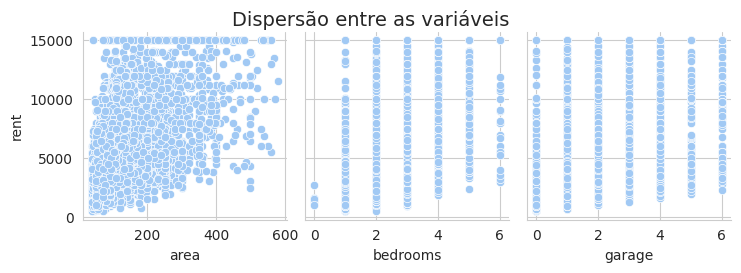

In [149]:
ax = sns.pairplot(dados_2, y_vars='rent', x_vars=['area', 'bedrooms', 'garage'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=14, y=1.05)
ax

In [150]:
y = dados_2['rent']

In [151]:
x = dados_2[['area', 'bedrooms', 'garage']]

### Estimativa do modelo de regressão linear

Utilização de 30% dos dados, selecionados  aleatoriamente, para a realização de testes do modelo.

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

In [153]:
modelo = LinearRegression()

In [154]:
modelo.fit(X_train, y_train)

LinearRegression()

In [155]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.47


In [156]:
y_previsto = modelo.predict(X_test)

In [157]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.43


#### Previsões pontuais

In [158]:
entrada = X_test[0:1]
entrada

,area,bedrooms,garage
8775,66,1,1


In [159]:
modelo.predict(entrada)[0]

2726.5295915141633

#### Simulador do preço de aluguel

In [160]:
# Simulador do preço do aluguel
area = 80
bedrooms = 3
garage = 2
entrada=[[area, bedrooms, garage]]


print('R$ {0:.2f}'.format(modelo.predict(entrada)[0]))

R$ 3849.51


### Interpretação dos coeficientes estimados

In [49]:
modelo.intercept_

888.1288766642292

In [50]:
type(modelo.intercept_)

numpy.float64

In [73]:
modelo.coef_

array([ 16.09705496, 121.63080593, 654.36428124])

In [74]:
type(modelo.coef_)

numpy.ndarray

In [75]:
x.columns

Index(['area', 'bedrooms', 'garage'], dtype='object')

In [76]:
index=['Intercepto','area', 'bedrooms', 'garage']

In [78]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,888.128877
area,16.097055
bedrooms,121.630806
garage,654.364281


**Interpretação dos Coeficientes Estimados**

**Intercepto** → Excluindo o efeito das variáveis explicativas ( X2=X3=X4=0 ) o efeito médio no valor do aluguel seria de R$ 888,13.

**Area** → Mantendo-se os valores de  X3  (quartos) e  X4  (garagem) constantes, o acréscimo de 1% na área gera um acréscimo de R$ 16,10 por m² no valor do aluguel imóvel.

**Quartos** → Mantendo-se os valores de  X2  (área) e  X4  (garagem) constantes, o acréscimo de 1% na garagem gera  gera um acréscimo de R$ 121,63 no valor do aluguel imóvel.

**Garagem** → Mantendo-se os valores de  X2  (área) e  X3  (quartos) constantes, o acréscimo de 1% na garagem gera um acréscimo de R$ 654,36 no valor do aluguel imóvel.

### Análise das Previsões do Modelo

In [83]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Valor do aluguel - Previsão', ylabel='Valor do aluguel - Real'>

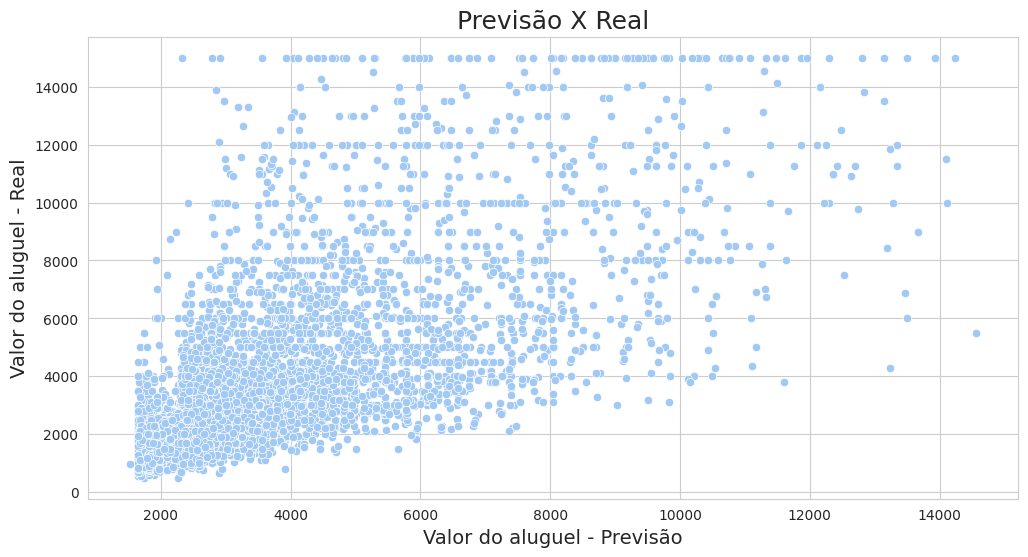

In [164]:
# Grafico de dispersão do valor previsto vs valor real
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Valor do aluguel - Previsão', fontsize=14)
ax.set_ylabel('Valor do aluguel - Real', fontsize=14)
ax

Nota-se que ainda existe uma dispersão, mesmo após o ajuste dos dados, indicando que a variância dos erros não é constante.

In [85]:
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Valor do aluguel - Previsão', ylabel='Resíduos'>

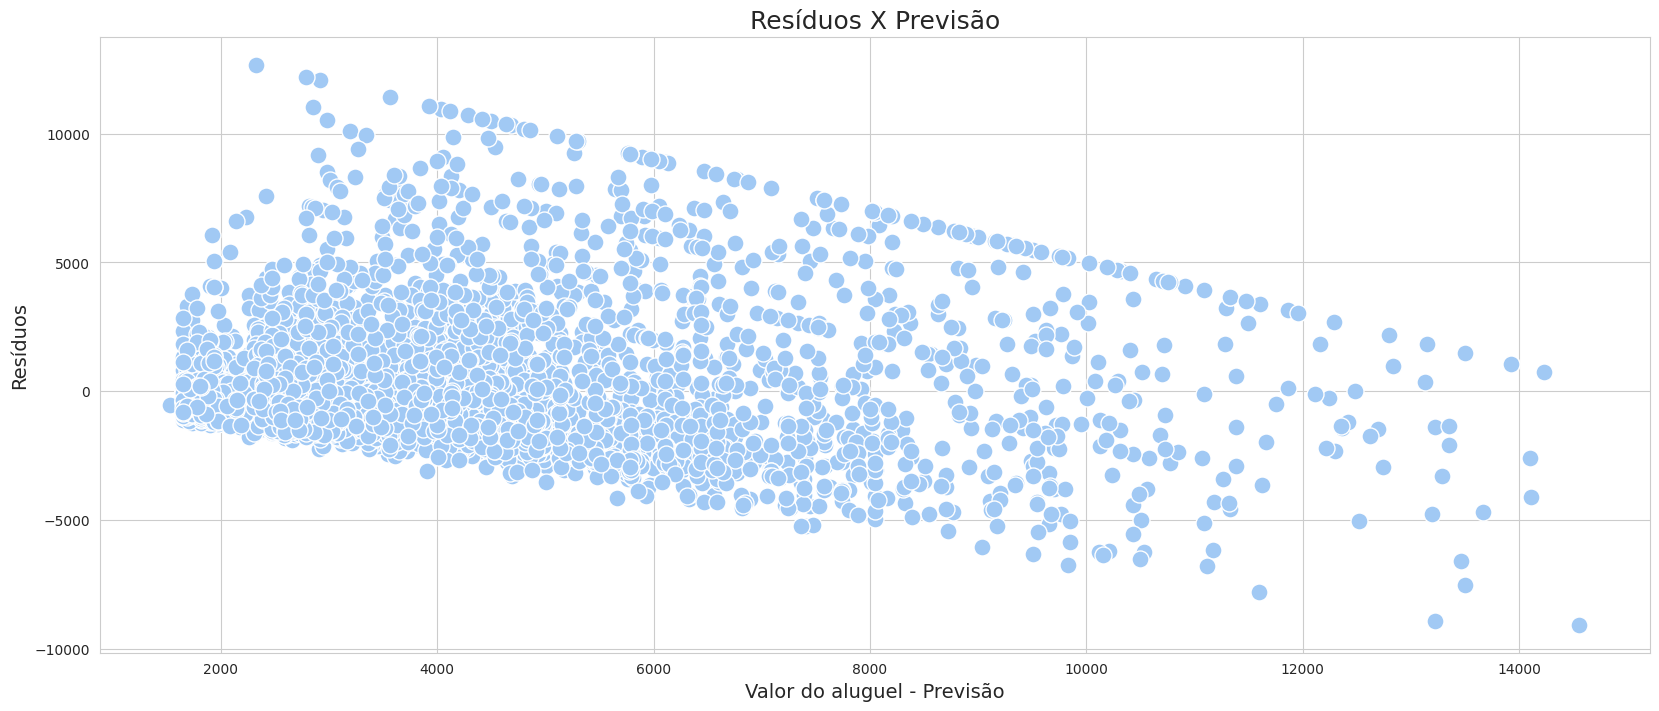

In [161]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Valor do aluguel - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Valor do aluguel - Previsão', ylabel='Resíduos²'>

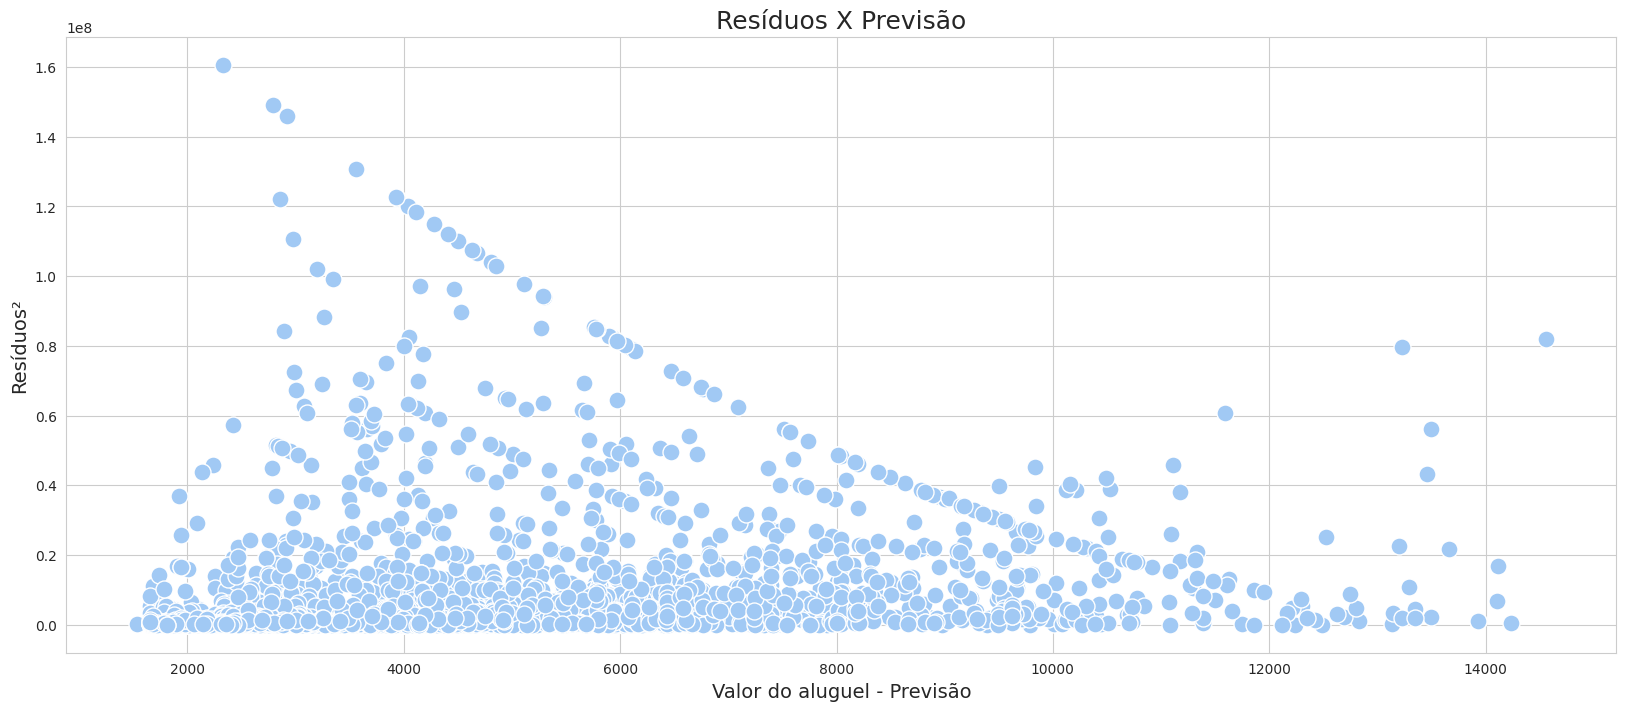

In [162]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Valor do aluguel - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

A representação do gráfico indica que a variância dos erros não é constantes

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Aluguel R$', ylabel='Density'>

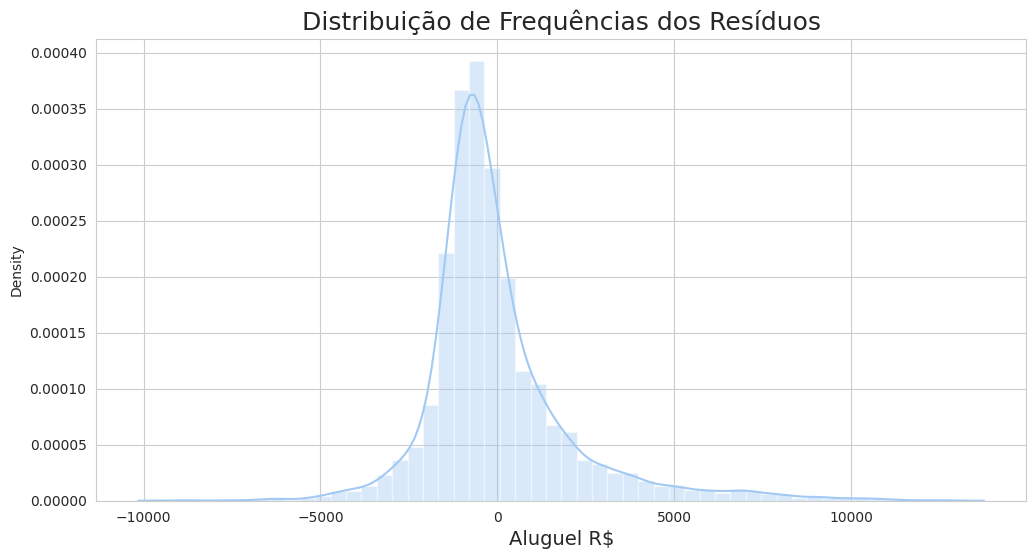

In [163]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Aluguel R$', fontsize=14)
ax

In [92]:
# Comparando os modelos
X2 = dados_2[['area', 'bedrooms', 'garage']]

In [93]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [94]:
modelo_2 = LinearRegression()

In [95]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [96]:
print('Modelo de valor de aluguel')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo de valor de aluguel
R² = 0.47


In [98]:
print('Modelo de valor de aluguel')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo de valor de aluguel
R² = 0.47


# **Conclusão**

A análise dos preços de aluguel em São Paulo revela uma grande variação nos valores  influenciado pelo tamanho do imóvel, número de quartos e vagas de garagem.

A regressão linear mostrou que imóveis maiores, com mais quartos e garagens, tendem a ter aluguéis mais elevados. No entanto, a dispersão dos dados e a variância não constante dos erros sugerem que outros fatores também podem influenciar nos preços dos aluguéis. Isso aponta para necessidade de considerar outras variáveis para uma previsão mais precisa. ​